In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [272]:
axes_settings = {
    "spines.top": False,
    "spines.right": False, 
}

plt.rc("axes", **axes_settings)

In [14]:
df = pd.read_csv("total-production.csv").T
df.columns = df.iloc[0]
df.drop(index="total_production", inplace=True)
df.head()

total_production  Angola Bolivia (Plurinational State of)      Brazil  \
1990              50.345                          122.777  27285.6286   
1991              79.331                          103.536  27293.4934   
1992               77.52                          120.235  34603.3542   
1993              32.608                           50.823  28166.9786   
1994              76.802                          116.944   28192.047   

total_production  Burundi   Ecuador Indonesia Madagascar   Malawi  \
1990              487.393  1503.815  7441.383    982.447  104.628   
1991              667.199  2123.824  8493.196    932.513  124.286   
1992              620.238   1185.48  5569.478   1121.684  137.161   
1993              393.354  2069.007  6743.288    441.859   62.111   
1994              664.143  2375.766  5367.878    641.372   84.112   

total_production Papua New Guinea Paraguay  ...   Panama Sierra Leone  \
1990                      962.841  130.627  ...  214.987       42.783   
1991                      746.816   79.653  ...  192.532       54.379   
1992                      900.111   54.291  ...  196.978       39.084   
1993                     1019.481   70.046  ...  142.066       37.451   
1994                     1138.659   24.689  ...  248.313       72.738   

total_production Sri Lanka  Thailand     Togo Trinidad & Tobago    Uganda  \
1990                 95.87   757.017  161.308            14.581  1955.009   
1991                81.549  1468.936  432.652            17.792  2088.001   
1992                53.181  1254.945   85.648            14.328  2185.074   
1993                 53.79  1275.201  194.939            16.079  3141.706   
1994                42.448  1399.135  176.296            18.435  2392.753   

total_production Venezuela  Viet Nam Yemen  
1990              1122.477  1310.288   0.0  
1991               940.704  1437.848   0.0  
1992              1215.298  2340.447   0.0  
1993              1332.881  3020.216   0.0  
1994               988.996  3631.609   0.0  

[5 rows x 56 columns]

In [31]:
#Finding Brazil stats vs the Rest of World
brazil_vs_rest = (df.assign(
rest_of_world = df.drop("Brazil", axis=1).sum(axis=1))
.loc[:, ["Brazil", "rest_of_world"]]
).astype({"Brazil":"float64"})

In [58]:
top_5_countries_list = list(df.sum(axis=0).sort_values(ascending=False)[:5].index)

In [59]:
top_5_countries_list

['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']

In [64]:
top5_vs_world = (df.assign(
                    rest_of_world = df.drop(top_5_countries_list, axis=1).sum(axis=1)
                    )
                 .loc[:, top_5_countries_list+["rest_of_world"]]
                )

In [66]:
top5_vs_world.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brazil         29 non-null     object 
 1   Viet Nam       29 non-null     object 
 2   Colombia       29 non-null     object 
 3   Indonesia      29 non-null     object 
 4   Ethiopia       29 non-null     object 
 5   rest_of_world  29 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.6+ KB


In [67]:
top5_vs_world = top5_vs_world.astype({"Brazil":"float64",
                                     "Viet Nam":"float64",
                                     "Colombia":"float64",
                                     "Indonesia":"float64",
                                     "Ethiopia":"float64"})

In [157]:
top5_vs_world_2018 = top5_vs_world.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "rest_of_world"
                                                            ]
                                                   ]

In [160]:
pd.DataFrame(top5_vs_world_2018)

2018
total_production            
Brazil            62924.8836
Viet Nam          31174.0742
Colombia          13857.9620
Indonesia          9417.5942
Ethiopia           7776.2234
rest_of_world     45786.0003

# Meshgrid Layout

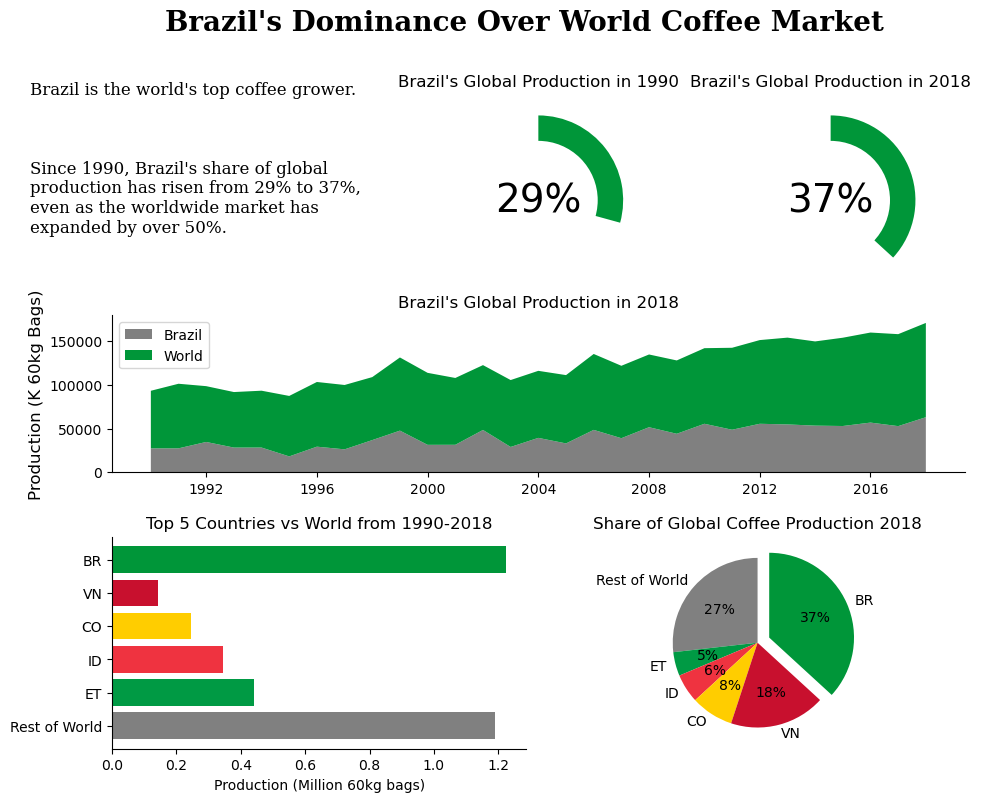

In [330]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(11,8.5))
gs = gridspec.GridSpec(nrows = 12, ncols=6)
fig.suptitle("Brazil's Dominance Over World Coffee Market",
            fontsize=20, 
            fontweight="bold",
            fontfamily="serif")

fig.text(.05, .695, 
'''Brazil is the world's top coffee grower.



Since 1990, Brazil's share of global 
production has risen from 29% to 37%, 
even as the worldwide market has 
expanded by over 50%.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

# Brazil vs World Production in 1990
ax1 = fig.add_subplot(gs[0:4, 2:4])
ax1.pie(brazil_vs_rest.iloc[0][::-1],
       startangle=90,
       pctdistance=.85,
        colors=["White", "#009639"]
       )

circle = plt.Circle((0,0), .70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.text(0,0,
         f"{round(brazil_vs_rest.loc['1990']['Brazil']/brazil_vs_rest.loc['1990'].sum()*100)}%",
         ha="center",
         va="center",
         fontsize=28
        )
ax1.set_title("Brazil's Global Production in 1990")

# Brazil vs World Production in 2018
ax2 = fig.add_subplot(gs[0:4, 4:8])
ax2.pie(brazil_vs_rest.iloc[-1][::-1],
       startangle=90,
       pctdistance=.85,
        colors=["White", "#009639"]
       )

circle = plt.Circle((0,0), .70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.text(0,0,
         f"{round(brazil_vs_rest.loc['2018']['Brazil']/brazil_vs_rest.loc['2018'].sum()*100)}%",
         ha="center",
         va="center",
         fontsize=28
        )
ax2.set_title("Brazil's Global Production in 2018")

# Brazil Share vs World 1990-2018
ax3 = fig.add_subplot(gs[4:7, 0:])
ax3.stackplot(
    brazil_vs_rest.index.astype("datetime64[ns]"),
    brazil_vs_rest["Brazil"],
    brazil_vs_rest["rest_of_world"], 
    colors=["grey", "#009639"],
    labels = ["Brazil", "World"]
)

ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")
ax3.set_ylabel("Production (K 60kg Bags)", fontsize=12)
ax3.legend(loc="upper left")


ax3.set_title("Brazil's Global Production in 2018")



# Top 5 Countries vs World from 1990-2018
ax5 = fig.add_subplot(gs[8:, 0:3])
ax5.barh(y=top5_vs_world_overall.index[::-1],
      width=top5_vs_world_overall["Overall"],
       color=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"],
       )

position = list(range(6))
labels= ["BR", "VN", "CO", "ID", "ET", "Rest of World"][::-1]

ax5.set_yticks(position)
ax5.set_yticklabels(labels)
ax5.set_xlabel("Production (Million 60kg bags)")
ax5.set_title("Top 5 Countries vs World from 1990-2018")

# Share of Global Coffee Production 2018
ax6 = fig.add_subplot(gs[8:, 3:])
ax6.pie(top5_vs_world_2018[::-1],
        startangle=90,
        autopct=f"%0.0f%%",
       colors = ["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639", "#C8102E", ],
       labels=labels,
        explode=(0,0,0,0, 0,.15)
       )

ax6.set_title("Share of Global Coffee Production 2018")


plt.show();